# <p style="background-color:#709699;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:10px 10px;">classification d'images de l'ensemble de données CIFAR-10 à l'aide de TensorFlow</p>

## <p style="background-color:#709699;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:10px 10px;">Information sur le dataset</p>
L'ensemble de données CIFAR-10 (Institut canadien de recherches avancées) est une collection d'images couramment utilisées pour former des algorithmes d'apprentissage automatique et de vision par ordinateur. C'est l'un des ensembles de données les plus largement utilisés pour la recherche en apprentissage automatique. L'ensemble de données CIFAR-10 contient 60 000 images en couleur 32x32 dans 10 classes différentes.
Les 10 classes différentes représentent les avions, les voitures, les oiseaux, les chats, les cerfs, les chiens, les grenouilles, les chevaux, les navires et les camions. Il y a 6 000 images de chaque classe.


<p style="background-color:d6edee;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:10px 10px;">L'ensemble de données CIFAR-10 est composé de 60 000 images en couleur de 32x32 réparties en 10 classes.Le dataset est subdivisé en deux parti : <br>La prémière partie contient 50 000 images <strong>"d'entraînement"</strong> <br> Et la deuxième 10 000 images pour le <strong>"test"</strong>.</p>

<center>
    <img src="cifar10image.png">
</center>
<p>[Information source: <a href="https://en.wikipedia.org/wiki/CIFAR-10" rel=" noreferrer nofollow">https://en.wikipedia.org/wiki/CIFAR-10</a>]
[Image Source: <a href="https://www.cs.toronto.edu/~kriz/cifar.html" rel=" noreferrer nofollow">https://www.cs.toronto.edu/~kriz/cifar.html</a>]</p>

# <!doctype html>
## [ Problème : prédire l'étiquette correcte pour chaque image donnée dans l'ensemble de données de test.](#1)
## <p style="background-color:#709699;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:10px 10px;">SOMMAIRE</p>

* [1. IMPORTATION DES PACKAGES](#1)
    
* [2. EXPLORATION DES DONNEES](#2)  
    
* [3. PREPROCESSING](#3)   
    
* [4.Choix du model](#4) 
      
* [5. Le model](#5)
    
* [6. compilation du model](#6)
    
* [7.Entrainement du model](#7)

* [8. Evaluation du model](#9)
    
* [9. CONCLUSION](#8)
    

## <p style="background-color:#709699;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:10px 10px;">IMPORTATION DES PACKAGES</p>

In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential, datasets
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.utils import to_categorical, plot_model

In [2]:
# print(tf.__version__)

## Chargement du dataset

In [3]:

Cifar10 = datasets.cifar10 # Telechargement

(xtrain,ytrain),(xtest,ytest)= Cifar10.load_data() 

In [4]:
# xtrain[0]
# ytrain.shape
# xtest.shape
# ytest.shape

* Nous avons 60 000 images dans le dataset. On a choisi 10 000 données comme données de test

## <p style="background-color:#709699;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:10px 10px;">EXPLORATION DES DONNEES</p>
 <p style = "font-family:newtimeroman;color:#8a8fd3">Voilà la liste qui va contenir les noms des 10 classes</p>

In [5]:
class_names =['Avion', 'Automobile', 'Oiseau', 'Chat', 'Cerf', 'Chien', 'Grenouille', 'Cheval', 'Navire', 'Camion']
print(class_names)

['Avion', 'Automobile', 'Oiseau', 'Chat', 'Cerf', 'Chien', 'Grenouille', 'Cheval', 'Navire', 'Camion']


### Évaluation des données

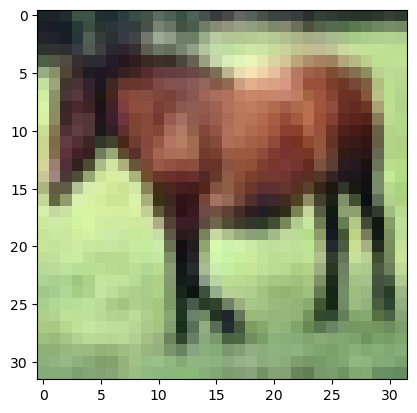

In [6]:
plt.imshow(xtrain[7])

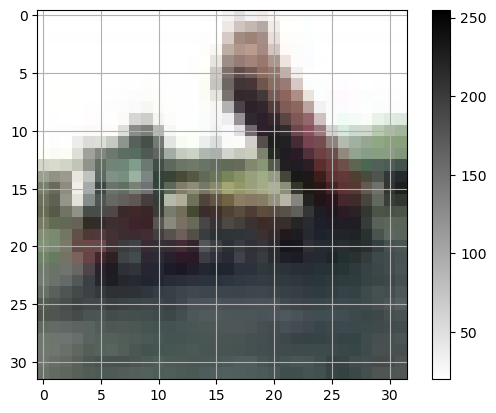

Class ID: [9] 
 Le nom de la class est: Camion


In [7]:
index=2 # changer le chiffre 
plt.imshow(xtrain[index], cmap=plt.cm.binary) # Vous pouvez utiliser cmap='gray'
plt.colorbar() # Pour afficher la barre sur le côté droit de l'image
plt.grid(True) 
plt.show()
print("Class ID: %s \n Le nom de la class est: %s" % (ytrain[index], class_names[ytrain[index][0]]))

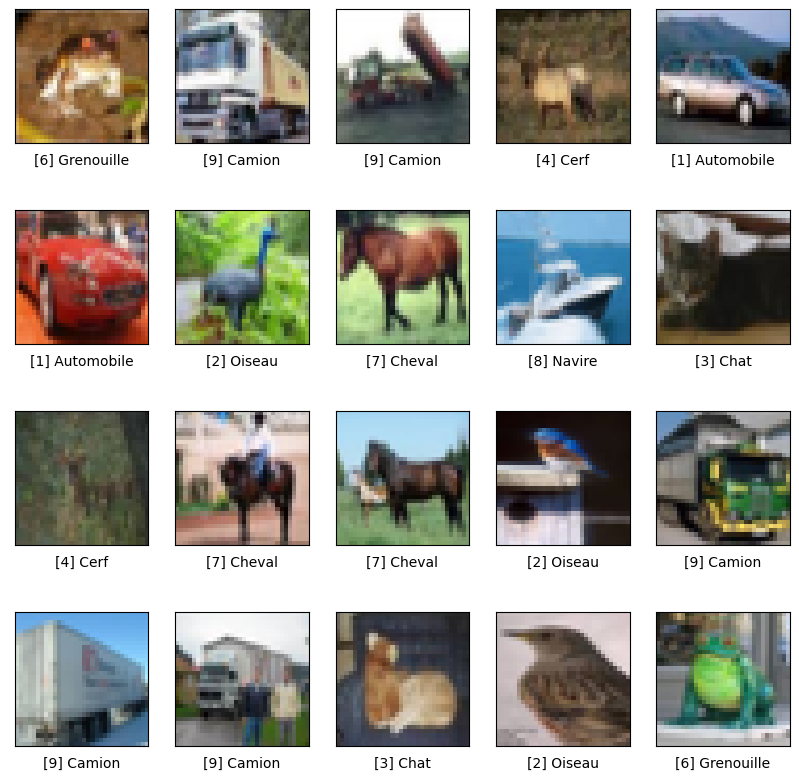

In [8]:
## les 20 premières images des données d’entrainement 
plt.figure(figsize=(10,10))
for i in range(20): 
    plt.subplot(4,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(xtrain[i], cmap=plt.cm.binary) # impression d'une image binaire

    #Les étiquettes du datat CIFAR sont des tableaux, c'est pourquoi nous avons besoin de l'index supplémentaire
    
    plt.xlabel("%s %s" % (ytrain[i], class_names[ytrain[i][0]])) # Attribuons un nom à chaque image
plt.show()

## <p style="background-color:#709699;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:10px 10px;">PREPROCESSING</p>
### <p style = "font-family:newtimeroman;color:#8a8fd3"> Préparation des données</p>
<p style = "font-family:newtimeroman;color:#8a8fd3"> Normalisation</p>
<p style = "font-family:newtimeroman;color:#8a8fd3"> Nous allons mettre à l'échelle la valeur entre 0 et 1 avant en divisant chaque valeur par 255</p>

In [9]:
#Nous allons mettre à l'échelle la valeur entre 0 et 1 avant en divisant chaque valeur par 255

xtrain = xtrain/255
print(xtrain.shape)

xtest = xtest/255 
print(xtest.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


### <p style = "font-family:newtimeroman;color:#8a8fd3">  Encodage des données</p>
<p style = "font-family:newtimeroman;color:#8a8fd3">  Encodage one-hot</p>
<p style = "font-family:newtimeroman;color:#8a8fd3"> Nous allons encoder les differentes classes</p>
 L'encodage one-hot ou encodage 1 parmi n consiste à encoder une variable à n états sur n bits dont un seul prend la valeur 1,le numéro du bit valant 1 étant le numéro de l'état pris par la variable.  source Wikipédia

In [10]:
# Avant l’encodage
print("ytrain Shape: %s and value: %s" % (ytrain.shape, ytrain))
print("ytest Shape: %s and value: %s" % (ytest.shape, ytest))

ytrain Shape: (50000, 1) and value: [[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]
ytest Shape: (10000, 1) and value: [[3]
 [8]
 [8]
 ...
 [5]
 [1]
 [7]]


In [11]:
ytrain=to_categorical(ytrain)
ytest=to_categorical(ytest)

# Apres l’encodage
print("ytrain Shape: %s and value: %s" % (ytrain.shape, ytrain[0]))
print("ytest Shape: %s and value: %s" % (ytest.shape, ytest[1]))

ytrain Shape: (50000, 10) and value: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
ytest Shape: (10000, 10) and value: [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


## <p style="background-color:#709699;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:10px 10px;">Choix du model</p>

Un convolutional neural network (CNN) est un type de réseau neuronal artificiel utilisé dans la reconnaissance et le traitement d’images et spécifiquement conçu pour traiter les données de pixels.

Les convolutional neural network sont de puissants systèmes de traitement d’images, d’intelligence artificielle (IA) qui utilisent un apprentissage approfondi (deep learning) pour effectuer des tâches à la fois génératives et descriptives, souvent à l’aide de Machine Vision qui inclut la reconnaissance d’images et de vidéos, ainsi que des systèmes de recommandation et le traitement du langage naturel (NPL).

Un réseau de neurones est un système de matériel et/ou de logiciel conçu d’après le fonctionnement des neurones du cerveau humain. Les réseaux neuronaux traditionnels ne sont pas idéaux pour le traitement des images et doivent être alimentés en images à résolution réduite. Les « neurones » dit CNN sont disposés de manière à ressembler davantage à ceux du lobe frontal, la zone responsable du traitement des stimuli visuels chez l’homme et des autres animaux. Les couches de neurones sont disposées de manière à couvrir l’ensemble du champ visuel, évitant ainsi le problème du traitement d’images par morceaux des réseaux neuronaux traditionnels.

Un CNN utilise un système semblable à un perceptron multicouche qui a été conçu pour des besoins de traitement réduits. Les couches d’un CNN se composent d’une couche d’entrée, d’une couche de sortie et d’une couche cachée qui comprend plusieurs couches convolutionnelles, des couches de regroupement, des couches entièrement connectées et des couches de normalisation. La suppression des limitations et l’augmentation de l’efficacité pour le traitement des images aboutissent à un système beaucoup plus efficace, plus simple à former, et spécialisé pour le traitement des images et le traitement du langage naturel.

<p>        <img width="1000" src="https://user-images.githubusercontent.com/26786663/27525317-b3026976-5a77-11e7-8767-8f4a06e5b696.jpg"></p>

## <p style="background-color:#709699;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:10px 10px;">Le model</p>

En apprentissage automatique, un réseau de neurones convolutifs ou réseau de neurones à convolution (en anglais CNN ou ConvNet pour convolutional neural networks) est un type de réseau de neurones artificiels acycliques (feed-forward), dans lequel le motif de connexion entre les neurones est inspiré par le cortex visuel des animaux. Les neurones de cette région du cerveau sont arrangés de sorte qu'ils correspondent à des régions qui se chevauchent lors du pavage du champ visuel. Leur fonctionnement est inspiré par les processus biologiques, ils consistent en un empilage multicouche de perceptrons, dont le but est de prétraiter de petites quantités d'informations. Les réseaux neuronaux convolutifs ont de larges applications dans la reconnaissance d'image et vidéo, les systèmes de recommandation et le traitement du langage naturel.

### Une architecture de réseau de neurones convolutifs est formée par un empilement de couches de traitement :

* la couche de convolution (CONV) qui traite les données d'un champ récepteur ;

* la couche de pooling (POOL), qui permet de compresser l'information en réduisant la taille de l'image intermédiaire (souvent par sous-échantillonnage) ;

* la couche de correction (ReLU), souvent appelée par abus « ReLU » en référence à la fonction d'activation (Unité de rectification linéaire) ;

* la couche « entièrement connectée » (FC), qui est une couche de type perceptron ;

* la couche de perte (LOSS).

<img src="img_cnn.png">

<a href="https://fr.wikipedia.org/wiki/R%C3%A9seau_neuronal_convolutif">Pour plus de détaille</a>

--------------------------------------------------------------------

## Formulation

<a href="https://en.wikipedia.org/wiki/Kernel_(image_processing)">Voir la formulation mathematique de conv2D</a>

------------------------------------------------------------ 


In [12]:
Model = Sequential()

Model.add(Conv2D(filters = 32, kernel_size=(3,3), activation = "relu", input_shape=(32,32,3)))
Model.add(MaxPooling2D(pool_size = (2,2)))

Model.add(Conv2D(filters = 64, kernel_size=(3,3), activation = "relu"))
Model.add(MaxPooling2D(pool_size = (2,2)))

Model.add(Conv2D(filters = 128, kernel_size=(3, 3), activation='relu'))
Model.add(MaxPooling2D(pool_size = (2,2)))

Model.add(Flatten())
Model.add(Dense(units = 128, activation = "relu"))
Model.add(Dense(units = 10, activation = "softmax"))

## <p style="background-color:#709699;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:10px 10px;">compilation du model</p>

Ici, on va configurer le modèle pour l’entraînement. On va entre autre clarifier:

* la fonction d'optimisation utilisée
* la fonction objectif (c'est une traduction pas terrible de loss)
* la liste des paramètres d'évaluation metrics

Il faut maintenant compiler le modèle et comme toujours en machine learning, il faut faire des choix. On doit déterminer quelle méthode d’optimisation on veut utiliser pour trouver les poids. On doit choisir une fonction de perte et une fonction de mesure de la précision.

Ces choix sont aussi importants que le choix de l’architecture du réseau. La méthode d’optimisation influence la vitesse d’entrainement du réseau et les deux autres paramètres permettent d’évaluer les performances de notre modèle.

Voici ce que j’ai choisi pour ce modèle.

In [13]:
Model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) 
print("Un résumé de ce qu’on a \n")
Model.summary()

Un résumé de ce qu’on a 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  

## <p style="background-color:#709699;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:10px 10px;">Entrainement du model</p>

In [14]:
xtrain.shape

(50000, 32, 32, 3)

C'est maintenant l'étape la plus coûteuse en temps machine : le réseau de neurone va s’entraîner pour la tache qu'on essaie de lui apprendre. Dans le cadre d'un apprentissage supervisé, il faut donc lui fournir, entre autres:

* des données d'entrée
* avec les labels correspondants
* éventuellement des données de validation, pour vérifier un certain nombre de chose (overfitting, ...)
* Le nombre d'epochs que va durer l'apprentissage

L’époque (epochs) correspond au nombre de passage effectués sur les poids. Plus il y a d’époques plus l’entrainement prendra de temps mais plus le modèle sera efficace.

Attention faire trop d’époques, c’est le meilleur moyen de tomber dans l’over-fitting.

In [15]:
Model.fit(xtrain, ytrain, epochs = 40, batch_size = 60, verbose = True, validation_data = (xtest,ytest))

Epoch 1/40
834/834 [==============================] - 63s 74ms/step - loss: 1.5219 - accuracy: 0.4453 - val_loss: 1.2072 - val_accuracy: 0.5673
Epoch 2/40
834/834 [==============================] - 71s 85ms/step - loss: 1.1239 - accuracy: 0.6012 - val_loss: 1.0341 - val_accuracy: 0.6354
Epoch 3/40
834/834 [==============================] - 73s 87ms/step - loss: 0.9519 - accuracy: 0.6657 - val_loss: 0.9375 - val_accuracy: 0.6710
Epoch 4/40
834/834 [==============================] - 60s 72ms/step - loss: 0.8446 - accuracy: 0.7053 - val_loss: 0.8666 - val_accuracy: 0.6936
Epoch 5/40
834/834 [==============================] - 60s 72ms/step - loss: 0.7607 - accuracy: 0.7360 - val_loss: 0.8525 - val_accuracy: 0.7080
Epoch 6/40
834/834 [==============================] - 60s 72ms/step - loss: 0.6914 - accuracy: 0.7600 - val_loss: 0.8332 - val_accuracy: 0.7098
Epoch 7/40
834/834 [==============================] - 62s 74ms/step - loss: 0.6357 - accuracy: 0.7793 - val_loss: 0.7946 - val_accuracy:

## <p style="background-color:#709699;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:10px 10px;"> Evaluation du model</p>

On peut maintenant évaluer le modèle, afin de vérifier s'il réussi à classifier, par exemple, des données qu'il n'a jamais rencontré pendant son apprentissage.

In [16]:
test_loss, test_acc = Model.evaluate(xtest, ytest)
print("accuracy:", test_acc)

313/313 [==============================] - 3s 11ms/step - loss: 2.2903 - accuracy: 0.7166
accuracy: 0.7166000008583069


## Prediction


In [17]:
predictions = Model.predict(xtest)

print("1. Prediction du vecteur: \n %s " % (predictions[0]))

print(" \n 2. Numéro d'étiquette ayant la confiance la plus élevée dans le tableau de prédiction: %s \n" % (np.argmax(predictions[0])))

print("3. Libellé réel dans l'ensemble de données: %s" % (ytest[0]))

313/313 [==============================] - 4s 11ms/step
1. Prediction du vecteur: 
 [2.49889796e-11 1.26049535e-18 1.55149689e-08 1.00000000e+00
 4.67150105e-16 1.11226961e-09 5.05970432e-10 1.00625545e-17
 7.00132834e-12 9.29944814e-20] 
 
 2. Numéro d'étiquette ayant la confiance la plus élevée dans le tableau de prédiction: 3 

3. Libellé réel dans l'ensemble de données: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


## LE test
* Une fonction pour la vérification de la prédiction 

In [18]:

def plot_image(i, predictions_array, true_label, img): 
    """ Cette fonction prend en paramètre l’ index et 3 tableaux à savoir.
    Le tableau de prédiction, le tableau contenant les vraies étiquettes et le tableau d'images"""
    
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary) 

    predicted_label=np.argmax(predictions_array)
    true_label=np.argmax(true_label)

      # print(predicted_label)
      # print(true_label)

    if predicted_label == true_label: 
        color='blue' # colorer en bleu les bonnes predictin

    else:
        color='red' # Colorer en rouge les mauvaise prediction

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                           100*np.max(predictions_array),
                                           class_names[true_label]),color=color)
  

    
def plot_value_array(i, predictions_array, true_label): 
    """ Fonction pour afficher un graphique à barres indiquant si la prédiction d'image est correcte.
    Elle prend en paramètre: l'index, le tableau de prédictions et le vrai tableau d'étiquettes"""
    
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot=plt.bar(range(10), predictions_array, color='gray')
    plt.ylim([0,1])
    predicted_label=np.argmax(predictions_array)
    true_label=np.argmax(true_label)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('green')

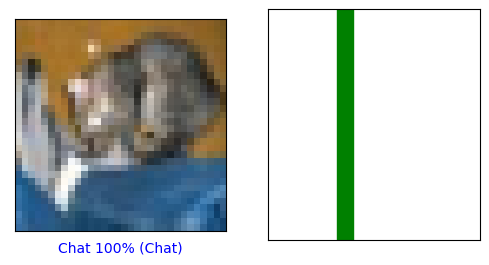

In [19]:

i=0 # image 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)

plot_image(i, predictions, ytest, xtest)
plt.subplot(1,2,2)
plot_value_array(i, predictions, ytest)
plt.show()

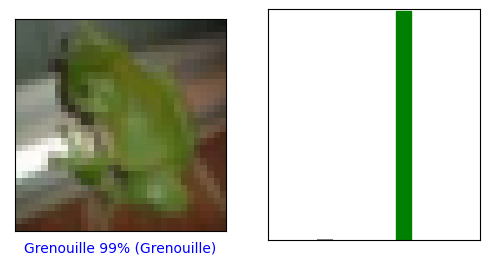

In [20]:
i=7 # image  7.
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, ytest, xtest)
plt.subplot(1,2,2)
plot_value_array(i, predictions, ytest)
plt.show()

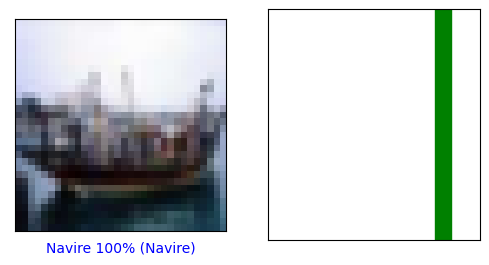

In [21]:
i=18
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, ytest, xtest)
plt.subplot(1,2,2)
plot_value_array(i, predictions, ytest)
plt.show()

(32, 32, 3)
(1, 32, 32, 3)
1/1 [==============================] - 0s 50ms/step
[[2.2927841e-19 2.8621335e-14 2.5873383e-08 2.8810250e-06 1.1747475e-06
  4.4318924e-11 9.9999595e-01 6.5572162e-21 1.6595762e-20 1.1007968e-16]]


(32, 32, 3)

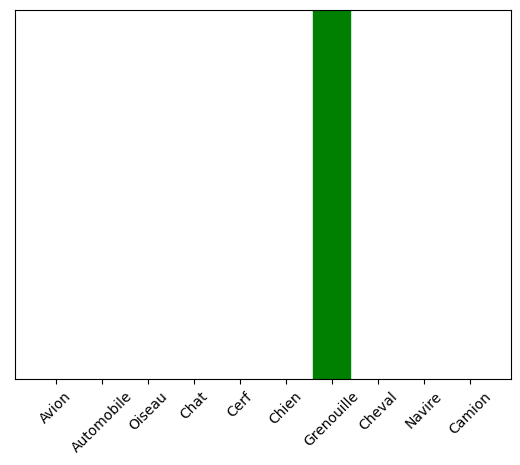

In [22]:
# vérification de notre prédiction sur une seule image

i=4
img = xtest[i]
print(img.shape)

img=(np.expand_dims(img,0))
print(img.shape)

predictions_single = Model.predict(img)
print(predictions_single)

plot_value_array(i, predictions,ytest)
_ = plt.xticks(range(10), class_names,rotation=45)

np.argmax(predictions_single[0])
(32, 32, 3)

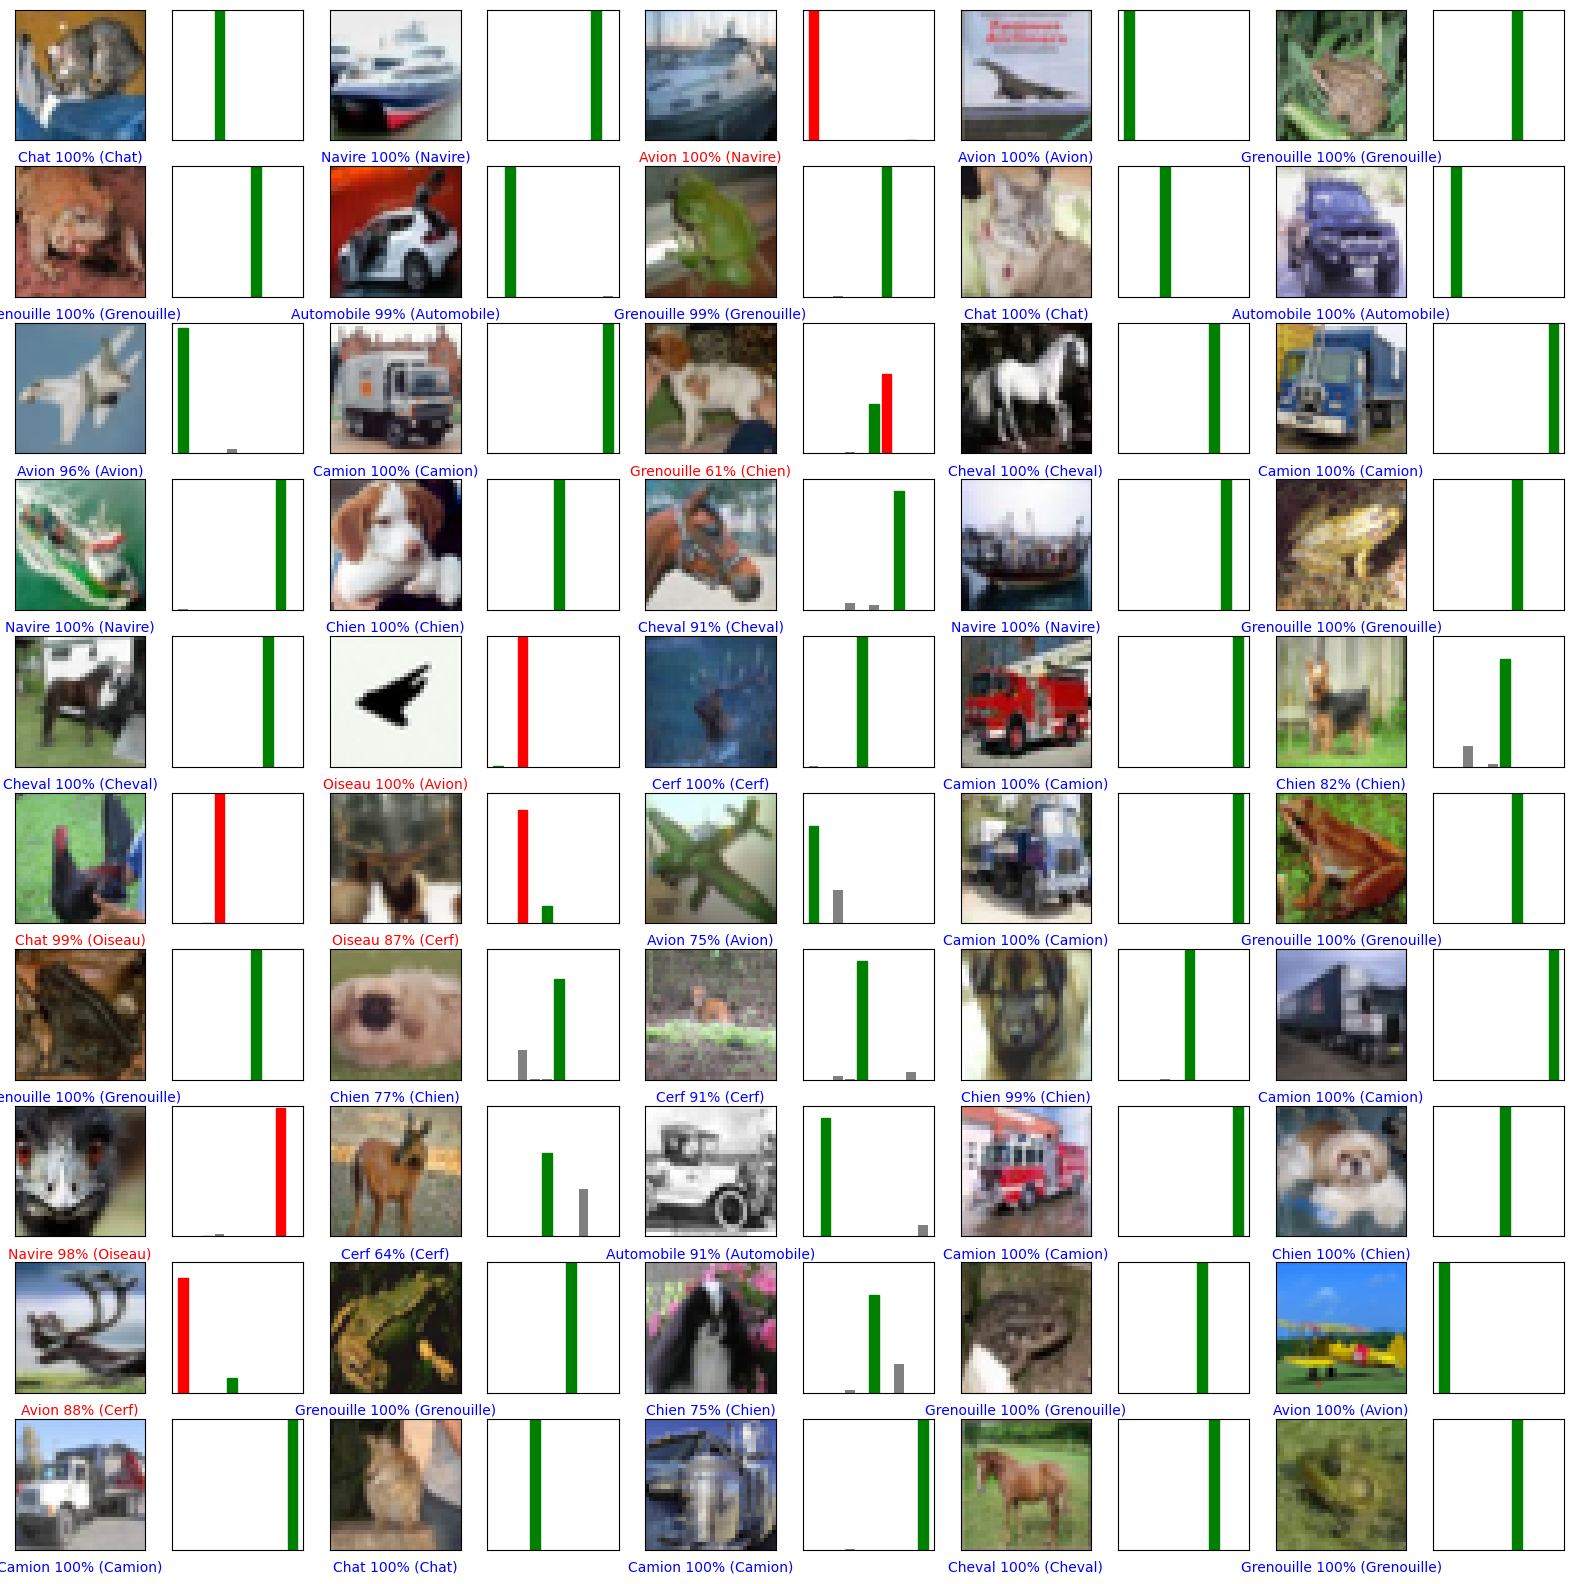

In [23]:
# vérification de plusieurs images

num_rows=10
num_cols=5
num_images=num_rows*num_cols

plt.figure(figsize=(2*2*num_cols,2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i,predictions, ytest, xtest)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, ytest)
plt.show()

Vus la qualité des images 

Le model arrive à identifier presque toutes les targettes, mais certaine image des Oiseau et de Cerf lui donne beaucoup de fils à tordre

Le model aurait pu être assez plus performent si les données d’entrainement étaient de bonne qualité

Avec un modèle séquentiel complexe comportant plusieurs couches de convolution et 40 époques pour l'apprentissage, nous avons obtenu une précision de 0,71 pour la prédiction du test.

La plupart des images peuvent être identifiées sauf dans quelques cas pour les cerfs et les Oiseau. Le modèle ne parvient pas à identifier les cerfs.